# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [61]:
import gzip
import _pickle as cPickle

# Add your imports here
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.svm import SVC
from sklearn import metrics

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [19]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", train_set[0].shape)
print("Validation set:", valid_set[0].shape)
print("Test set:", test_set[0].shape)

Training set: (50000, 784)
Validation set: (10000, 784)
Test set: (10000, 784)


#### b) Visualize (plot) the images of some digits of the MNIST database

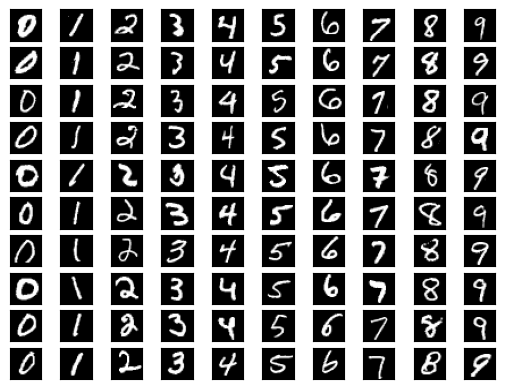

In [56]:
samples_per_class = 10
_, ax = plt.subplots(samples_per_class,10)

found = np.zeros(10, dtype=np.uint8)

while np.any(found < samples_per_class):
    idx = randint(0, train_set[0].shape[0])
    c = train_set[1][idx]
    if found[c] >= samples_per_class: continue
    ax[found[c], c].imshow(train_set[0][idx].reshape(28,28), cmap='gray')
    ax[found[c], c].set_xticks([])
    ax[found[c], c].set_yticks([])
    found[c] += 1
    
plt.show()

#### c) Build the final training and test sets, which should be balanced

In [4]:
# Your code here

### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

In [60]:
# Your code here

SVC()

### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [6]:
# Your code here

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [7]:
# Your code here

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

_Your answer here_

b) Which digit classes are the best/worse recognized against which? Why?

_Your answer here_

c) What is the impact of the sizes of the training and test sets on the classification performance?

_Your answer here_